# Introduction

Computer vision and machine learning are discussed and deployed in many fields in today's era. Image classification is one of the topics in computer vision. Due to my genuine interest in this field, this project will focus on solving a multi-class image classification problem. The data was taken from Kaggle [1]. It is an Intel image classification challenge and contains around 14000 images and 3000 images of size 150x150 under 6 classes in the train and test sets respectively.

# Methods

Convolutional Neural Network (CNN) is good at image recognition as they can pick up low-level features, for instance, colour chunks and edges. Grouping them to construct higher-level features, for example, hair, ears, and the like [2]. This is the reason why CNN from TensorFlow was used in this project. For the sake of faster performance, Google Colab was deployed for all the data exploration and model training processes below.

Firstly, my personal google drive was mounted to Colab for data access. The data was then unzipped and got ready for the data inspecting phase. After that, the data was loaded from the directories and converted into batches. A baseline model with 2 convolutional layers, each has 32 filters and activated with Basic Rectified Linear Unit (ReLU), followed by a pooling layer, 2 convolutional layers with the same hyperparameters, and a pooling layer, was created. The model was evaluated evaluated by their training and validation loss and accuracy. After that, models with small tweaks were created to reduce overfitting, find the best learning rate, and most importantly, improve accuracy.

# Getting the data

Because the data set was uploaded to my google drive, my drive was mounted locally and the data was then unzipped for use.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
# Unzip the data
with zipfile.ZipFile('/content/drive/MyDrive/intel_image_classification.zip', 'r') as zip_ref:
  zip_ref.extractall()

# Inspecting the data

### Class imbalance

After inspecting the training and test data, we can see that there is a slight imbalance between classes. The max difference is between mountain and buildings (2512 - 2191 = 321). Sometimes class imbalance can induce bias in the model. But considering the size of the dataset, nearly 14000 images for all classes, 321 difference between two classes is considered mild and would not make a huge impact on the model.

In [3]:
import os
# Walk through the intel image classification training set
for dirpath, dirnames, filenames in os.walk('seg_train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 1 directories and 0 images in seg_train.
There are 6 directories and 0 images in seg_train/seg_train.
There are 0 directories and 2512 images in seg_train/seg_train/mountain.
There are 0 directories and 2191 images in seg_train/seg_train/buildings.
There are 0 directories and 2271 images in seg_train/seg_train/forest.
There are 0 directories and 2274 images in seg_train/seg_train/sea.
There are 0 directories and 2382 images in seg_train/seg_train/street.
There are 0 directories and 2404 images in seg_train/seg_train/glacier.


In [4]:
# Walk through the intel image classification test set
for dirpath, dirnames, filenames in os.walk('seg_test'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 1 directories and 0 images in seg_test.
There are 6 directories and 0 images in seg_test/seg_test.
There are 0 directories and 525 images in seg_test/seg_test/mountain.
There are 0 directories and 437 images in seg_test/seg_test/buildings.
There are 0 directories and 474 images in seg_test/seg_test/forest.
There are 0 directories and 510 images in seg_test/seg_test/sea.
There are 0 directories and 501 images in seg_test/seg_test/street.
There are 0 directories and 553 images in seg_test/seg_test/glacier.


In [5]:
# Setup the train and test directories
train_dir = 'seg_train/seg_train'
test_dir = 'seg_test/seg_test'

In [6]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [7]:
from glob import glob
import matplotlib.pyplot as plt
import random

def view_random_images(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_img = random.sample(os.listdir(target_folder), 8)
  print(random_img)

  img_1 = plt.imread(target_folder + '/' + random_img[0])
  img_2 = plt.imread(target_folder + '/' + random_img[1])
  img_3 = plt.imread(target_folder + '/' + random_img[2])
  img_4 = plt.imread(target_folder + '/' + random_img[3])
  img_5 = plt.imread(target_folder + '/' + random_img[4])
  img_6 = plt.imread(target_folder + '/' + random_img[5])
  img_7 = plt.imread(target_folder + '/' + random_img[6])
  img_8 = plt.imread(target_folder + '/' + random_img[7])

  # Read in the image and plot it using matplotlib
  fig, ax = plt.subplots(2, 4, figsize = (12,6), sharex= True, sharey = True)
  plt.suptitle(f'Class: {target_class}', fontsize = 'xx-large')
  ax[0, 0].imshow(img_1)
  ax[0, 0].axis('off')
  ax[0, 1].imshow(img_2)
  ax[0, 1].axis('off')
  ax[0, 2].imshow(img_3)
  ax[0, 2].axis('off')
  ax[0, 3].imshow(img_4)
  ax[0, 3].axis('off')
  ax[1, 0].imshow(img_5)
  ax[1, 0].axis('off')
  ax[1, 1].imshow(img_6)
  ax[1, 1].axis('off')
  ax[1, 2].imshow(img_7)
  ax[1, 2].axis('off')
  ax[1, 3].imshow(img_8)
  ax[1, 3].axis('off')
  plt.show()

  print(f'Image_1 shape: {img_1.shape}') # Show the shape of the image
  print(f'Image_2 shape: {img_2.shape}')
  print(f'Image_3 shape: {img_3.shape}')
  print(f'Image_4 shape: {img_4.shape}')
  print(f'Image_5 shape: {img_5.shape}')
  print(f'Image_6 shape: {img_6.shape}')
  print(f'Image_7 shape: {img_7.shape}')
  print(f'Image_8 shape: {img_8.shape}')

['13764.jpg', '7678.jpg', '14884.jpg', '11266.jpg', '9853.jpg', '19019.jpg', '12186.jpg', '15972.jpg']


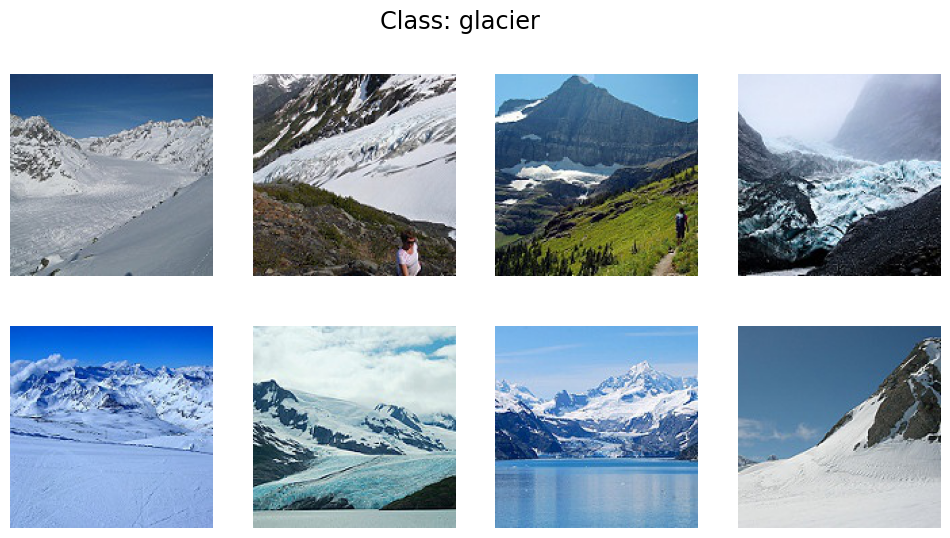

Image_1 shape: (150, 150, 3)
Image_2 shape: (150, 150, 3)
Image_3 shape: (150, 150, 3)
Image_4 shape: (150, 150, 3)
Image_5 shape: (150, 150, 3)
Image_6 shape: (150, 150, 3)
Image_7 shape: (150, 150, 3)
Image_8 shape: (150, 150, 3)


In [8]:
# Viewing random images
view_random_images(target_dir = 'seg_train/seg_train/',
        target_class = 'glacier')

### Images with noise

After viewing some random images, we can see that a few numbers of them have some noise and might affect the model. In the leftmost image, the colour of the image is distorted, and a person is presented in the middle of the photo. In the middle image, the sea is blocked by a huge rock. This could cause the model to misclassify it as a mountain. In the rightmost image, a person presents in the centre of the photo and obscures most of the building.

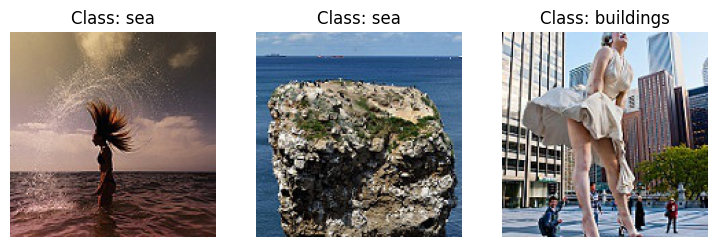

In [9]:
# View the images with noise (Large rock, people etc.)
img_1 = plt.imread("seg_train/seg_train/sea/300.jpg")
img_2 = plt.imread("seg_train/seg_train/sea/2338.jpg")
img_3 = plt.imread("seg_train/seg_train/buildings/16594.jpg")
fig, ax = plt.subplots(1, 3, figsize = (9,3), sharex= True, sharey = True)
ax[0].imshow(img_1)
ax[0].set_title('Class: sea')
ax[0].axis('off')
ax[1].imshow(img_2)
ax[1].set_title('Class: sea')
ax[1].axis('off')
ax[2].imshow(img_3)
ax[2].set_title('Class: buildings')
ax[2].axis('off')
plt.show()

## Dealing with misclassificaion under the 'glacier' data

During inspecting random images, some misclassification issues were discovered. After checking the folders, there is a substantial number of images in glacier training set and the test set was discovered. After consideration, some images will be moved to the correct classes, and some will be deleted if the content of the image is completely irrelevant to any of the classes.

In [10]:
import shutil

def move_image(current_dir, current_class, target_dir, target_class, filename):
  '''Move misclassified image'''

  path = current_dir+current_class
  move_to = target_dir+target_class
  filename = filename
  src = path+filename
  dst = move_to+filename
  shutil.move(src,dst)
  print(f"'{path}{filename}' has been moved to '{move_to}{filename}'.")

In [11]:
def delete_image(target_dir, target_class, filename):
  '''Delete misclassified image'''

  path = target_dir+target_class+filename
  os.remove(path)
  print(f"'{path}' has been deleted.")

In [12]:
def view_random_misclassified_images(path, list, title):
  '''View misclassified 4 images randomly'''

  from PIL import Image  

  random_misclassified_images = [Image.open(path + file, 'r') for file in list]

  random_misclassified_images = random.sample(random_misclassified_images, 4)

  img_1 = random_misclassified_images[0]
  img_2 = random_misclassified_images[1]
  img_3 = random_misclassified_images[2]
  img_4 = random_misclassified_images[3]
  print(f'{img_1.filename},\n{img_2.filename},\n{img_3.filename},\n{img_4.filename}')

  fig, ax = plt.subplots(1, 4, figsize = (12,3), sharex = True, sharey = True)
  plt.suptitle(title, fontsize = 'xx-large')
  ax[0].imshow(img_1)
  ax[0].axis('off')
  ax[1].imshow(img_2)
  ax[1].axis('off')
  ax[2].imshow(img_3)
  ax[2].axis('off')
  ax[3].imshow(img_4)
  ax[3].axis('off')
  display()

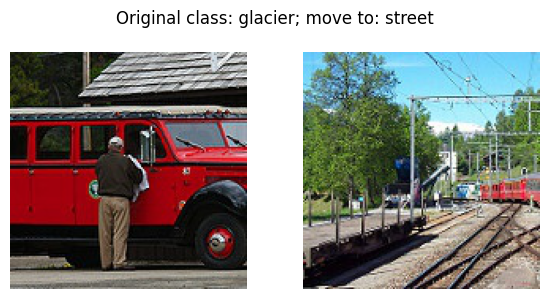

In [13]:
# List of misclassified images that belong to street in glacier folder
move_to_street = ['8987.jpg', '14851.jpg']

# View the msiclassified images from glacier that belong to street
img_1 = plt.imread("seg_train/seg_train/glacier/8987.jpg")
img_2 = plt.imread("seg_train/seg_train/glacier/14851.jpg")

fig, ax = plt.subplots(1, 2, figsize = (6,3), sharex= True, sharey = True)
plt.suptitle('Original class: glacier; move to: street')
ax[0].imshow(img_1)
ax[0].axis('off')

ax[1].imshow(img_2)
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Move images to street
for images in move_to_street:
  move_image(current_dir = "seg_train/seg_train/",
        current_class = "glacier/",
        target_dir = "seg_train/seg_train/", 
        target_class = "street/", 
        filename = images)

'seg_train/seg_train/glacier/8987.jpg' has been moved to 'seg_train/seg_train/street/8987.jpg'.
'seg_train/seg_train/glacier/14851.jpg' has been moved to 'seg_train/seg_train/street/14851.jpg'.


seg_train/seg_train/glacier/12053.jpg,
seg_train/seg_train/glacier/4476.jpg,
seg_train/seg_train/glacier/15477.jpg,
seg_train/seg_train/glacier/8224.jpg


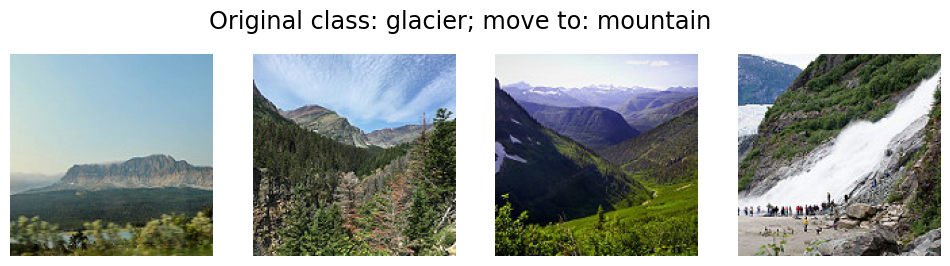

In [15]:
# List of misclassified images that belong to mountain in glacier folder
move_to_mountain = ['564.jpg', '674.jpg', '697.jpg', '746.jpg', '1861.jpg', '2249.jpg','2372.jpg', '3512.jpg', 
          '3736.jpg', '4006.jpg', '4084.jpg', '4159.jpg', '4400.jpg', '4476.jpg', '5078.jpg', '5275.jpg',
          '5867.jpg', '5985.jpg', '6007.jpg', '6418.jpg', '6734.jpg', '6967.jpg',
          '6978.jpg', '7386.jpg', '7494.jpg', '7535.jpg', '7633.jpg', '7708.jpg', '8224.jpg',
          '8225.jpg', '8714.jpg', '8927.jpg', '9055.jpg', '9481.jpg', 
          '10011.jpg', '10741.jpg', '11097.jpg','11286.jpg', '12053.jpg', '13108.jpg', '13189.jpg', '14012.jpg',
          '14431.jpg', '14690.jpg', '14884.jpg', '14979.jpg', '15032.jpg', 
          '15036.jpg', '15039.jpg', '15477.jpg', '16345.jpg',  '17528.jpg', '17957.jpg', '18426.jpg', '18430.jpg', 
          '18686.jpg', '19900.jpg', '19975.jpg']

# View the msiclassified example images from glacier that belong to mountain
view_random_misclassified_images('seg_train/seg_train/glacier/', move_to_mountain, 'Original class: glacier; move to: mountain')

In [16]:
# Move images to mountain
for images in move_to_mountain:
  move_image(current_dir = "seg_train/seg_train/",
        current_class = "glacier/",
        target_dir = "seg_train/seg_train/", 
        target_class = "mountain/", 
        filename = images)

'seg_train/seg_train/glacier/564.jpg' has been moved to 'seg_train/seg_train/mountain/564.jpg'.
'seg_train/seg_train/glacier/674.jpg' has been moved to 'seg_train/seg_train/mountain/674.jpg'.
'seg_train/seg_train/glacier/697.jpg' has been moved to 'seg_train/seg_train/mountain/697.jpg'.
'seg_train/seg_train/glacier/746.jpg' has been moved to 'seg_train/seg_train/mountain/746.jpg'.
'seg_train/seg_train/glacier/1861.jpg' has been moved to 'seg_train/seg_train/mountain/1861.jpg'.
'seg_train/seg_train/glacier/2249.jpg' has been moved to 'seg_train/seg_train/mountain/2249.jpg'.
'seg_train/seg_train/glacier/2372.jpg' has been moved to 'seg_train/seg_train/mountain/2372.jpg'.
'seg_train/seg_train/glacier/3512.jpg' has been moved to 'seg_train/seg_train/mountain/3512.jpg'.
'seg_train/seg_train/glacier/3736.jpg' has been moved to 'seg_train/seg_train/mountain/3736.jpg'.
'seg_train/seg_train/glacier/4006.jpg' has been moved to 'seg_train/seg_train/mountain/4006.jpg'.
'seg_train/seg_train/glacier

seg_train/seg_train/glacier/5217.jpg,
seg_train/seg_train/glacier/8137.jpg,
seg_train/seg_train/glacier/7721.jpg,
seg_train/seg_train/glacier/3518.jpg


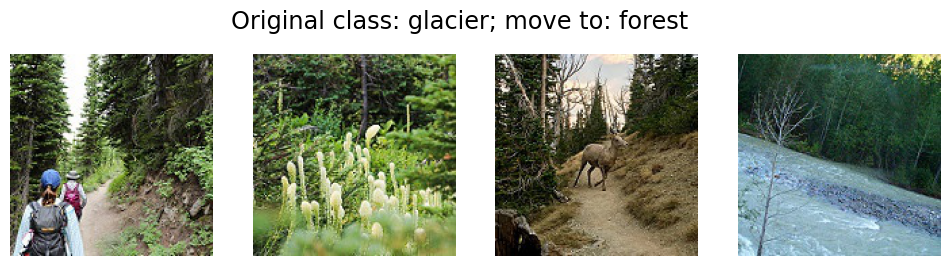

In [17]:
# List of misclassified images that belong to forest in glacier folder
move_to_forest = ['1864.jpg', '3518.jpg', '5217.jpg', '7721.jpg', '8137.jpg', 
          '17168.jpg', '19441.jpg', '20028.jpg']

# View the msiclassified example images from glacier that belong to forest
view_random_misclassified_images('seg_train/seg_train/glacier/', move_to_forest, 'Original class: glacier; move to: forest')

In [18]:
# Move images to forest
for images in move_to_forest:
  move_image(current_dir = "seg_train/seg_train/",
        current_class = "glacier/",
        target_dir = "seg_train/seg_train/",
        target_class = "forest/", 
        filename = images)

'seg_train/seg_train/glacier/1864.jpg' has been moved to 'seg_train/seg_train/forest/1864.jpg'.
'seg_train/seg_train/glacier/3518.jpg' has been moved to 'seg_train/seg_train/forest/3518.jpg'.
'seg_train/seg_train/glacier/5217.jpg' has been moved to 'seg_train/seg_train/forest/5217.jpg'.
'seg_train/seg_train/glacier/7721.jpg' has been moved to 'seg_train/seg_train/forest/7721.jpg'.
'seg_train/seg_train/glacier/8137.jpg' has been moved to 'seg_train/seg_train/forest/8137.jpg'.
'seg_train/seg_train/glacier/17168.jpg' has been moved to 'seg_train/seg_train/forest/17168.jpg'.
'seg_train/seg_train/glacier/19441.jpg' has been moved to 'seg_train/seg_train/forest/19441.jpg'.
'seg_train/seg_train/glacier/20028.jpg' has been moved to 'seg_train/seg_train/forest/20028.jpg'.


seg_train/seg_train/glacier/12624.jpg,
seg_train/seg_train/glacier/109.jpg,
seg_train/seg_train/glacier/15290.jpg,
seg_train/seg_train/glacier/17926.jpg


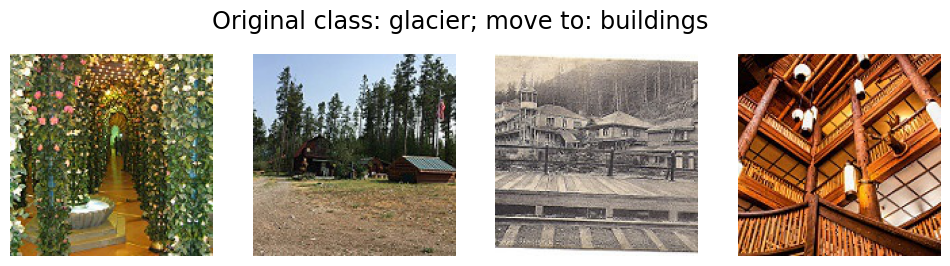

In [19]:
# List of misclassified images that belong to forest in glacier folder
move_to_buildings = ['109.jpg', '1669.jpg', '11537.jpg', '12624.jpg', '15290.jpg', '17926.jpg']

# View the msiclassified example images from glacier that belong to buildings
view_random_misclassified_images('seg_train/seg_train/glacier/', move_to_buildings, 'Original class: glacier; move to: buildings')

In [20]:
# Move images to buildings
for images in move_to_buildings:
  move_image(current_dir = "seg_train/seg_train/",
        current_class = "glacier/",
        target_dir = "seg_train/seg_train/", 
        target_class = "buildings/", 
        filename = images)

'seg_train/seg_train/glacier/109.jpg' has been moved to 'seg_train/seg_train/buildings/109.jpg'.
'seg_train/seg_train/glacier/1669.jpg' has been moved to 'seg_train/seg_train/buildings/1669.jpg'.
'seg_train/seg_train/glacier/11537.jpg' has been moved to 'seg_train/seg_train/buildings/11537.jpg'.
'seg_train/seg_train/glacier/12624.jpg' has been moved to 'seg_train/seg_train/buildings/12624.jpg'.
'seg_train/seg_train/glacier/15290.jpg' has been moved to 'seg_train/seg_train/buildings/15290.jpg'.
'seg_train/seg_train/glacier/17926.jpg' has been moved to 'seg_train/seg_train/buildings/17926.jpg'.


seg_train/seg_train/glacier/3808.jpg,
seg_train/seg_train/glacier/15468.jpg,
seg_train/seg_train/glacier/10130.jpg,
seg_train/seg_train/glacier/12083.jpg


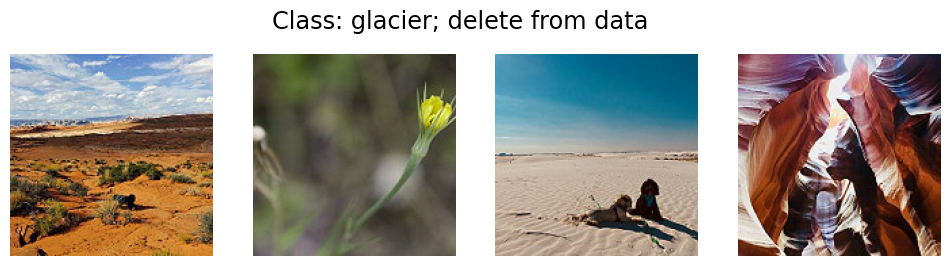

In [21]:
# List of misclassified images that will be deleted in glacier folder
delete_from_glacier = ['496.jpg', '550.jpg', '969.jpg', '1044.jpg', '1126.jpg', '1232.jpg', '1358.jpg', '1512.jpg', '1626.jpg', 
            '2000.jpg', '2239.jpg', '2837.jpg', '3808.jpg', '4077.jpg', '4238.jpg', '4385.jpg',
            '5268.jpg', '5683.jpg', '5701.jpg', '5715.jpg', '6283.jpg', '7127.jpg', '7831.jpg', '8419.jpg', 
            '9406.jpg', '9985.jpg', '10130.jpg', '10505.jpg', '10935.jpg', 
            '11070.jpg', '11821.jpg', '12083.jpg', '12634.jpg', '13417.jpg', '14033.jpg', '14860.jpg',
            '15267.jpg', '15401.jpg', '15468.jpg', '15884.jpg', '16185.jpg', '16416.jpg', '16467.jpg', '16710.jpg', '17312.jpg', 
            '17682.jpg', '17782.jpg', '17841.jpg', '18709.jpg', '18736.jpg', '19622.jpg', '19988.jpg', '20007.jpg', 
            '20030.jpg']

# View the msiclassified example images that will be deleted
view_random_misclassified_images('seg_train/seg_train/glacier/', delete_from_glacier, 'Class: glacier; delete from data')

In [22]:
# Delete images from glacier folder
for images in delete_from_glacier:
  delete_image(target_dir = "seg_train/seg_train/", 
        target_class = "glacier/", 
        filename = images)

'seg_train/seg_train/glacier/496.jpg' has been deleted.
'seg_train/seg_train/glacier/550.jpg' has been deleted.
'seg_train/seg_train/glacier/969.jpg' has been deleted.
'seg_train/seg_train/glacier/1044.jpg' has been deleted.
'seg_train/seg_train/glacier/1126.jpg' has been deleted.
'seg_train/seg_train/glacier/1232.jpg' has been deleted.
'seg_train/seg_train/glacier/1358.jpg' has been deleted.
'seg_train/seg_train/glacier/1512.jpg' has been deleted.
'seg_train/seg_train/glacier/1626.jpg' has been deleted.
'seg_train/seg_train/glacier/2000.jpg' has been deleted.
'seg_train/seg_train/glacier/2239.jpg' has been deleted.
'seg_train/seg_train/glacier/2837.jpg' has been deleted.
'seg_train/seg_train/glacier/3808.jpg' has been deleted.
'seg_train/seg_train/glacier/4077.jpg' has been deleted.
'seg_train/seg_train/glacier/4238.jpg' has been deleted.
'seg_train/seg_train/glacier/4385.jpg' has been deleted.
'seg_train/seg_train/glacier/5268.jpg' has been deleted.
'seg_train/seg_train/glacier/5683.

seg_test/seg_test/glacier/24279.jpg,
seg_test/seg_test/glacier/22473.jpg,
seg_test/seg_test/glacier/22625.jpg,
seg_test/seg_test/glacier/20491.jpg


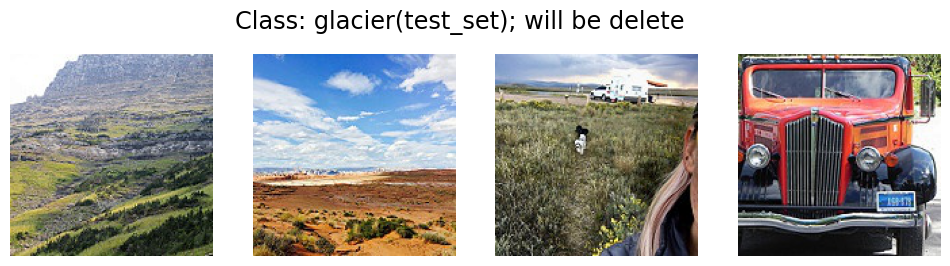

In [23]:
# List of misclassified images that will be deleted in glacier test set
delete_from_glacier_test_set = ['20491.jpg', '20480.jpg', '21949.jpg', '21840.jpg', '22011.jpg', '22625.jpg',
          '22473.jpg', '23361.jpg', '23282.jpg', '23272.jpg', '23314.jpg',
          '23951.jpg', '23819.jpg', '23593.jpg', '23497.jpg', '24279.jpg', '24096.jpg']

# View the misclassified example images from glacier_test_set
view_random_misclassified_images('seg_test/seg_test/glacier/', delete_from_glacier_test_set, 'Class: glacier(test_set); will be delete')

In [24]:
for images in delete_from_glacier_test_set:
  delete_image(target_dir = "seg_test/seg_test/", 
        target_class = "glacier/", 
        filename = images)

'seg_test/seg_test/glacier/20491.jpg' has been deleted.
'seg_test/seg_test/glacier/20480.jpg' has been deleted.
'seg_test/seg_test/glacier/21949.jpg' has been deleted.
'seg_test/seg_test/glacier/21840.jpg' has been deleted.
'seg_test/seg_test/glacier/22011.jpg' has been deleted.
'seg_test/seg_test/glacier/22625.jpg' has been deleted.
'seg_test/seg_test/glacier/22473.jpg' has been deleted.
'seg_test/seg_test/glacier/23361.jpg' has been deleted.
'seg_test/seg_test/glacier/23282.jpg' has been deleted.
'seg_test/seg_test/glacier/23272.jpg' has been deleted.
'seg_test/seg_test/glacier/23314.jpg' has been deleted.
'seg_test/seg_test/glacier/23951.jpg' has been deleted.
'seg_test/seg_test/glacier/23819.jpg' has been deleted.
'seg_test/seg_test/glacier/23593.jpg' has been deleted.
'seg_test/seg_test/glacier/23497.jpg' has been deleted.
'seg_test/seg_test/glacier/24279.jpg' has been deleted.
'seg_test/seg_test/glacier/24096.jpg' has been deleted.


In [25]:
# Walk through the intel image classification training set after deleting some images
for dirpath, dirnames, filenames in os.walk('seg_train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 1 directories and 0 images in seg_train.
There are 6 directories and 0 images in seg_train/seg_train.
There are 0 directories and 2570 images in seg_train/seg_train/mountain.
There are 0 directories and 2197 images in seg_train/seg_train/buildings.
There are 0 directories and 2279 images in seg_train/seg_train/forest.
There are 0 directories and 2274 images in seg_train/seg_train/sea.
There are 0 directories and 2384 images in seg_train/seg_train/street.
There are 0 directories and 2276 images in seg_train/seg_train/glacier.


In [26]:
# Walk through the intel image classification test set after deleting some images
for dirpath, dirnames, filenames in os.walk('seg_test'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 1 directories and 0 images in seg_test.
There are 6 directories and 0 images in seg_test/seg_test.
There are 0 directories and 525 images in seg_test/seg_test/mountain.
There are 0 directories and 437 images in seg_test/seg_test/buildings.
There are 0 directories and 474 images in seg_test/seg_test/forest.
There are 0 directories and 510 images in seg_test/seg_test/sea.
There are 0 directories and 501 images in seg_test/seg_test/street.
There are 0 directories and 536 images in seg_test/seg_test/glacier.


# Processing the data

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and convert them into batches
train_set = train_datagen.flow_from_directory(train_dir,
                        target_size = (150, 150),
                        batch_size = 32,
                        class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                        target_size = (150, 150),
                        batch_size = 32,
                        class_mode = 'categorical')

Found 13980 images belonging to 6 classes.
Found 2983 images belonging to 6 classes.


# Creating a baseline model

In [28]:
import tensorflow as tf
from keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

# Compile the model
model_1.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy'])

In [29]:
# Fit the model
history_1 = model_1.fit(train_set,
            epochs = 5,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set))

Epoch 1/5
437/437 [==============================] - 40s 63ms/step - loss: 0.9219 - accuracy: 0.6415 - val_loss: 0.7919 - val_accuracy: 0.7006
Epoch 2/5
437/437 [==============================] - 26s 60ms/step - loss: 0.5958 - accuracy: 0.7833 - val_loss: 0.6361 - val_accuracy: 0.7784
Epoch 3/5
437/437 [==============================] - 27s 63ms/step - loss: 0.4428 - accuracy: 0.8443 - val_loss: 0.6585 - val_accuracy: 0.7663
Epoch 4/5
437/437 [==============================] - 26s 60ms/step - loss: 0.3109 - accuracy: 0.8901 - val_loss: 0.6174 - val_accuracy: 0.8029
Epoch 5/5
437/437 [==============================] - 27s 62ms/step - loss: 0.2173 - accuracy: 0.9264 - val_loss: 0.7948 - val_accuracy: 0.7932


In [30]:
# Get model_1 summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                    

In [31]:
# Plot the training and validation curves
def plot_loss_curves(history):
  '''
  Get the separate loss curves for the training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss curves
  fig, ax = plt.subplots(1, 2, figsize = (15, 5))
  ax[0].plot(epochs, loss, label = 'Training loss')
  ax[0].plot(epochs, val_loss, label = 'Validation loss')
  ax[0].legend()
  ax[0].set_title('Loss')

  ax[1].plot(epochs, accuracy, label = 'Training accuracy')
  ax[1].plot(epochs, val_accuracy, label = 'Validation accuracy')
  ax[1].legend()
  ax[1].set_title('Accuracy')

  for ax in ax.flat:
    ax.set(xlabel = 'epochs')

  plt.tight_layout()
  plt.show()

We can see that the model is overfitting since the 'training loss' keeps decreasing while the 'validation loss' starts to increase. This indicates that the model is learning the training set too well and cannot make accurate predictions on the test data.

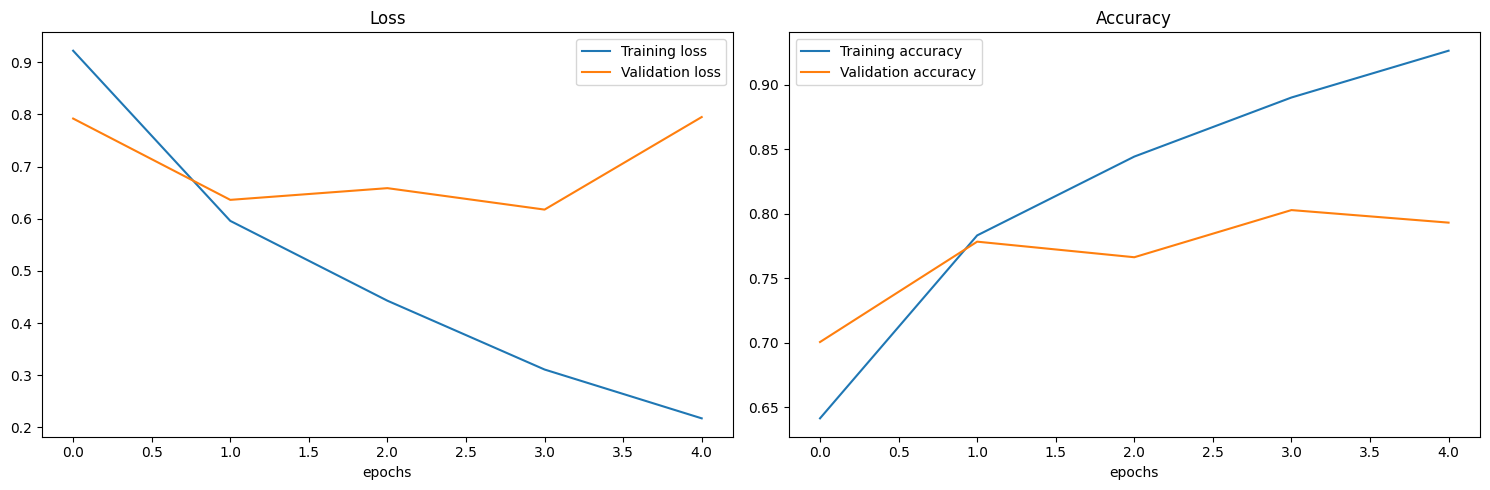

In [32]:
plot_loss_curves(history_1)

# Simplifying the model to reduce overfitting (Create new model: model_2)

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

# Compile the model
model_2.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy'])

In [34]:
# Fit model_2
history_2 = model_2.fit(train_set,
            epochs = 5,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set))

Epoch 1/5
437/437 [==============================] - 27s 59ms/step - loss: 0.9372 - accuracy: 0.6433 - val_loss: 0.8083 - val_accuracy: 0.7140
Epoch 2/5
437/437 [==============================] - 24s 55ms/step - loss: 0.6505 - accuracy: 0.7596 - val_loss: 0.6111 - val_accuracy: 0.7787
Epoch 3/5
437/437 [==============================] - 25s 58ms/step - loss: 0.5502 - accuracy: 0.8014 - val_loss: 0.6105 - val_accuracy: 0.7861
Epoch 4/5
437/437 [==============================] - 25s 58ms/step - loss: 0.4627 - accuracy: 0.8351 - val_loss: 0.5186 - val_accuracy: 0.8203
Epoch 5/5
437/437 [==============================] - 31s 72ms/step - loss: 0.3886 - accuracy: 0.8634 - val_loss: 0.5509 - val_accuracy: 0.8163


We can see that when comparing model_1 with model_2, the total params decreased around 70%. This less complicated model mitigates overfitting.

In [35]:
# Get model_2 summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 32)      

However, model_2 is still overfitting. Let's further reduce the complicity of the model.

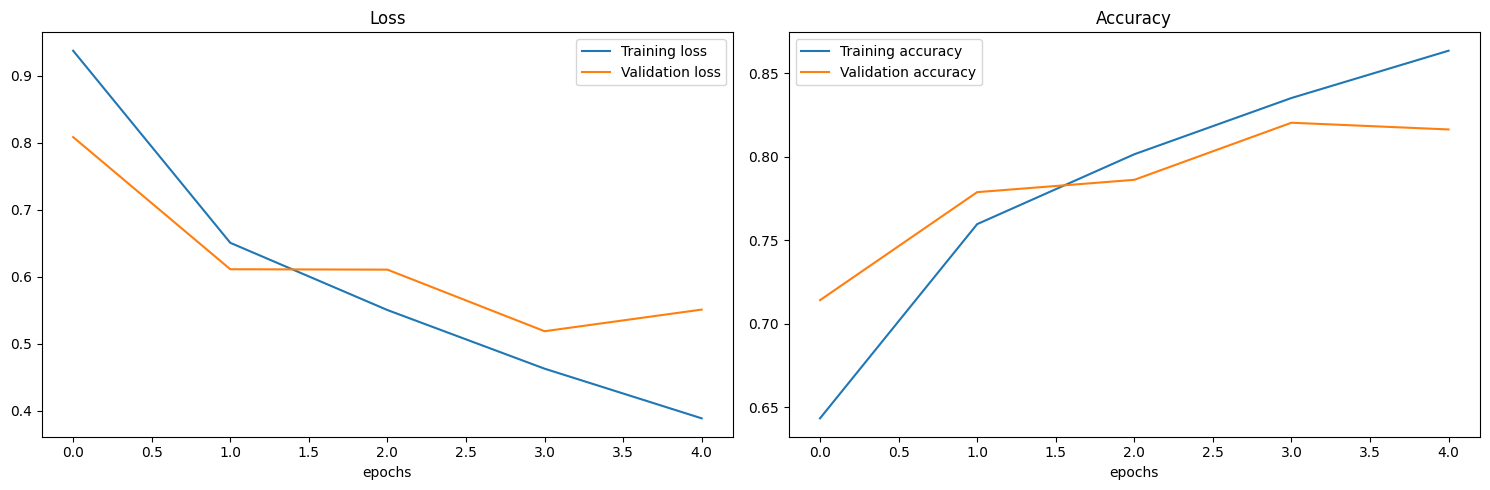

In [36]:
plot_loss_curves(history_2)

# Tweaking the model (Create model_3)

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

# Compile the model
model_3.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy'])

In [38]:
# Fit model_3
history_3 = model_3.fit(train_set,
            epochs = 5,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set))

Epoch 1/5
437/437 [==============================] - 26s 57ms/step - loss: 1.0620 - accuracy: 0.5781 - val_loss: 0.8485 - val_accuracy: 0.6805
Epoch 2/5
437/437 [==============================] - 24s 56ms/step - loss: 0.7501 - accuracy: 0.7175 - val_loss: 0.7029 - val_accuracy: 0.7449
Epoch 3/5
437/437 [==============================] - 26s 59ms/step - loss: 0.6062 - accuracy: 0.7824 - val_loss: 0.5945 - val_accuracy: 0.7878
Epoch 4/5
437/437 [==============================] - 26s 60ms/step - loss: 0.5313 - accuracy: 0.8111 - val_loss: 0.5886 - val_accuracy: 0.8059
Epoch 5/5
437/437 [==============================] - 26s 58ms/step - loss: 0.4771 - accuracy: 0.8291 - val_loss: 0.5876 - val_accuracy: 0.7838


Comparing with model_2, the total params of model_3 further reduces by around 59%.

In [39]:
# Get model_3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 10)        2890      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 10)      

We can see that the training and validation loss keep decreasing, while their accuracy are increasing. This means model_3 is improving compared with the previous three models.

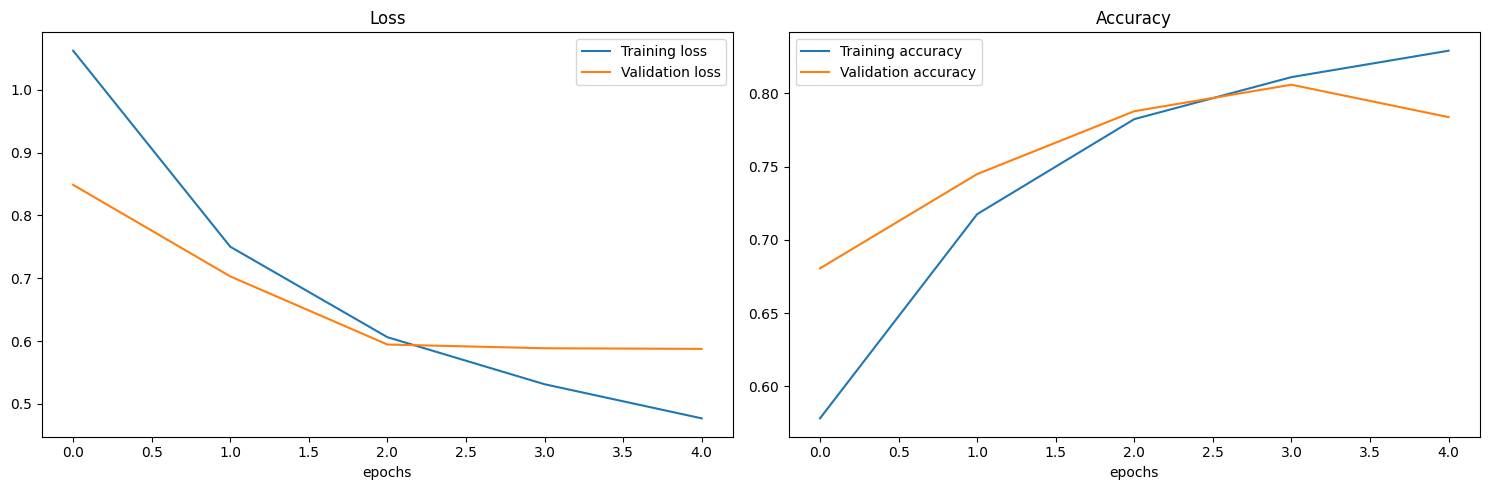

In [40]:
plot_loss_curves(history_3)

# Finding the best learning rate (Create model_4 - same as model_3)

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# Compile the model
model_4.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy'])

In [42]:
# Fit model_4
history_4 = model_4.fit(train_set,
            epochs = 50,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set),
            callbacks=[lr_scheduler])

Epoch 1/50
437/437 [==============================] - 26s 57ms/step - loss: 1.2841 - accuracy: 0.4866 - val_loss: 1.0254 - val_accuracy: 0.5970 - lr: 1.0000e-04
Epoch 2/50
437/437 [==============================] - 25s 57ms/step - loss: 0.9513 - accuracy: 0.6391 - val_loss: 0.9170 - val_accuracy: 0.6564 - lr: 1.1220e-04
Epoch 3/50
437/437 [==============================] - 24s 55ms/step - loss: 0.8577 - accuracy: 0.6769 - val_loss: 0.8260 - val_accuracy: 0.6969 - lr: 1.2589e-04
Epoch 4/50
437/437 [==============================] - 25s 58ms/step - loss: 0.7722 - accuracy: 0.7190 - val_loss: 0.8260 - val_accuracy: 0.6889 - lr: 1.4125e-04
Epoch 5/50
437/437 [==============================] - 26s 59ms/step - loss: 0.7232 - accuracy: 0.7350 - val_loss: 0.7556 - val_accuracy: 0.7228 - lr: 1.5849e-04
Epoch 6/50
437/437 [==============================] - 25s 57ms/step - loss: 0.6771 - accuracy: 0.7542 - val_loss: 0.6864 - val_accuracy: 0.7529 - lr: 1.7783e-04
Epoch 7/50
437/437 [==============

In [43]:
import pandas as pd

history_4_df = pd.DataFrame(history_4.history)
history_4_df.head()

loss  accuracy  val_loss  val_accuracy        lr
0  1.284096  0.486624  1.025418      0.597050  0.000100
1  0.951340  0.639056  0.916955      0.656386  0.000112
2  0.857693  0.676896  0.826005      0.696949  0.000126
3  0.772218  0.719027  0.826018      0.688904  0.000141
4  0.723223  0.734979  0.755636      0.722762  0.000158

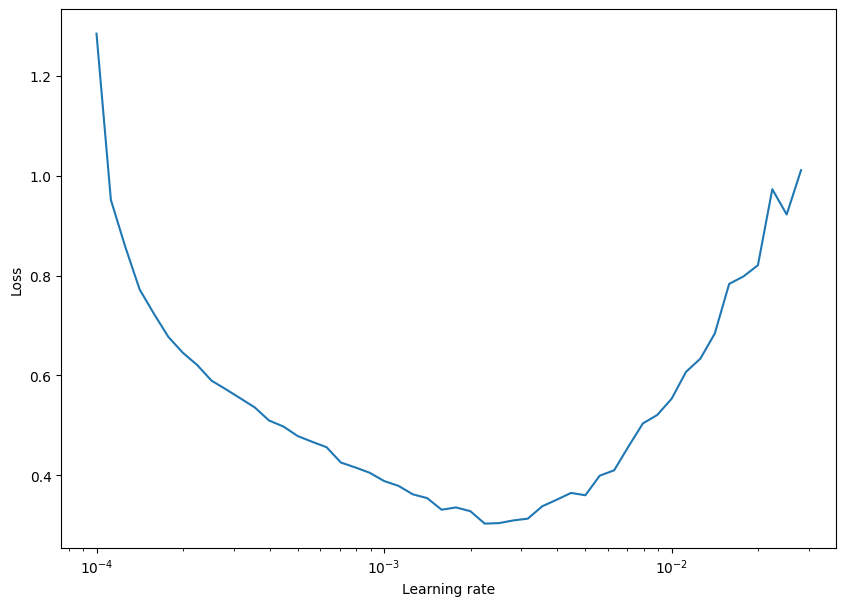

In [44]:
# Plot the loss against the learning rate
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

##Let's set the learning rate from 0.001(default) to 0.002

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

# Compile the model
model_5.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(learning_rate = 0.002),
        metrics = ['accuracy'])

In [46]:
# Fit model_5
history_5 = model_5.fit(train_set,
            epochs = 5,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set))

Epoch 1/5
437/437 [==============================] - 27s 58ms/step - loss: 1.0247 - accuracy: 0.5995 - val_loss: 0.8255 - val_accuracy: 0.6742
Epoch 2/5
437/437 [==============================] - 26s 58ms/step - loss: 0.7231 - accuracy: 0.7254 - val_loss: 0.6905 - val_accuracy: 0.7298
Epoch 3/5
437/437 [==============================] - 26s 59ms/step - loss: 0.6001 - accuracy: 0.7810 - val_loss: 0.6242 - val_accuracy: 0.7704
Epoch 4/5
437/437 [==============================] - 26s 59ms/step - loss: 0.5218 - accuracy: 0.8109 - val_loss: 0.5801 - val_accuracy: 0.7851
Epoch 5/5
437/437 [==============================] - 24s 56ms/step - loss: 0.4819 - accuracy: 0.8264 - val_loss: 0.5511 - val_accuracy: 0.8089


The model improves after setting the learning rate from 0.001 to 0.002...let's try to fit model_6 for longer to see if the model can get better(the architecture is same as model_5).

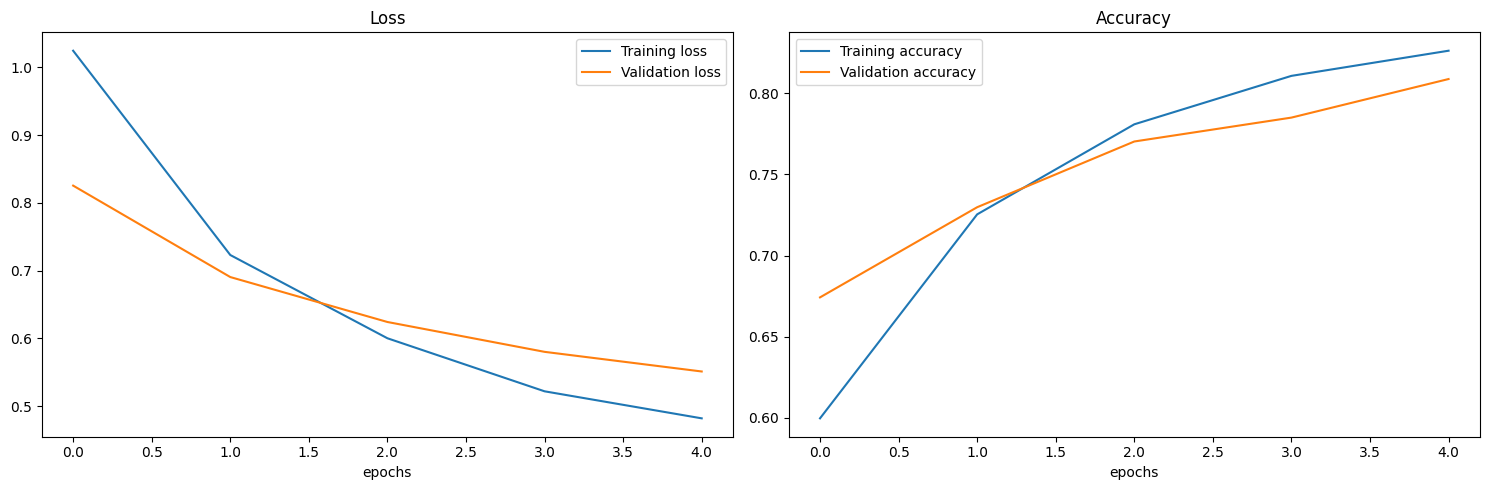

In [47]:
plot_loss_curves(history_5)

## Let's try to fit model_3 for longer... (Increase epochs from 5 to 20)

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a callback to stop training when the metric has stopped improving
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss',patience = 3)

# Create a model
model_6 = Sequential([
    Conv2D(32, 3,activation = 'relu', input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3,activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(6, activation = 'softmax')
])

# Compile the model
model_6.compile(loss = 'categorical_crossentropy',
        optimizer = Adam(learning_rate = 0.002),
        metrics = ['accuracy'])

In [49]:
# Fit model_6
history_6 = model_6.fit(train_set,
            epochs = 20,
            steps_per_epoch = len(train_set),
            validation_data = test_set,
            validation_steps = len(test_set),
            callbacks = callback)

Epoch 1/20
437/437 [==============================] - 27s 59ms/step - loss: 1.0284 - accuracy: 0.6005 - val_loss: 0.8029 - val_accuracy: 0.6879
Epoch 2/20
437/437 [==============================] - 26s 59ms/step - loss: 0.7186 - accuracy: 0.7335 - val_loss: 0.7447 - val_accuracy: 0.7479
Epoch 3/20
437/437 [==============================] - 26s 60ms/step - loss: 0.6131 - accuracy: 0.7784 - val_loss: 0.6630 - val_accuracy: 0.7637
Epoch 4/20
437/437 [==============================] - 26s 59ms/step - loss: 0.5394 - accuracy: 0.8091 - val_loss: 0.7057 - val_accuracy: 0.7452
Epoch 5/20
437/437 [==============================] - 26s 59ms/step - loss: 0.4795 - accuracy: 0.8318 - val_loss: 0.5940 - val_accuracy: 0.7905
Epoch 6/20
437/437 [==============================] - 24s 56ms/step - loss: 0.4437 - accuracy: 0.8410 - val_loss: 0.5825 - val_accuracy: 0.8015
Epoch 7/20
437/437 [==============================] - 25s 58ms/step - loss: 0.3965 - accuracy: 0.8570 - val_loss: 0.5940 - val_accuracy:

After increasing the epoch, the model starts overfitting again and the validation accuracy didn't improve significant compared with model_5 (around 80% for both models).

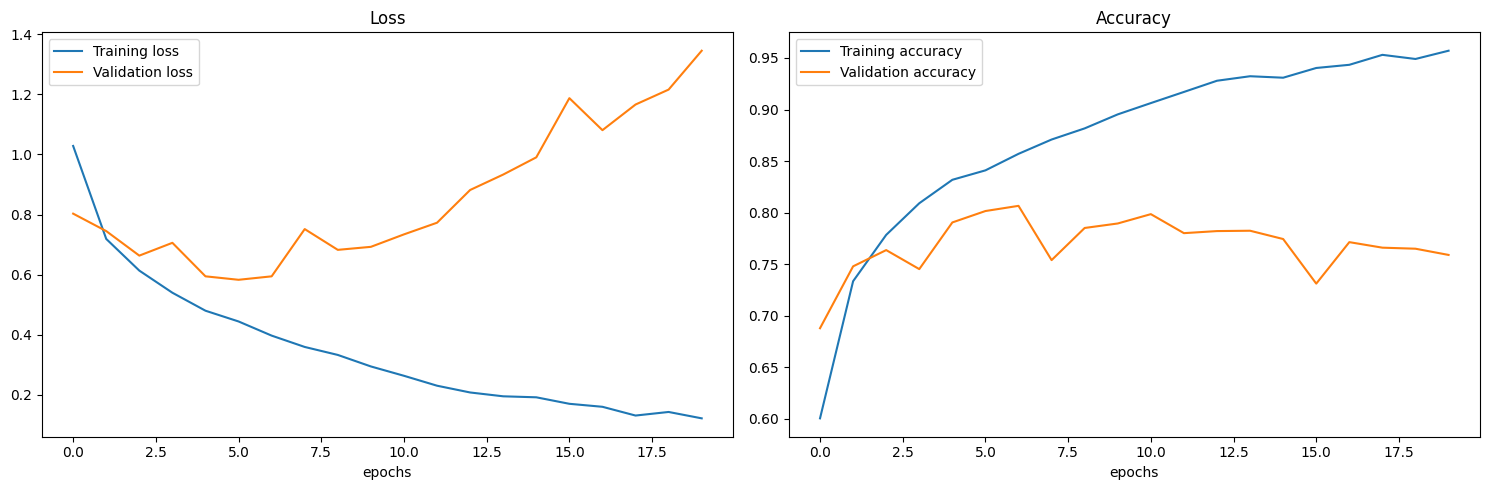

In [50]:
plot_loss_curves(history_6)

# Evaluating model_5

In [51]:
import numpy as np

# Create a test_generator that set shuffle to False
test_datagen = ImageDataGenerator(rescale = 1/255.)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames

nb_samples = len(filenames)

# Make prediction with model_5
predict = model_5.predict(test_generator,steps = nb_samples)

predicted_classes = np.argmax(predict, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

Found 2983 images belonging to 6 classes.
2983/2983 [==============================] - 9s 3ms/step


In [52]:
# Generate the classification report
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   buildings       0.76      0.82      0.79       437
      forest       0.94      0.93      0.93       474
     glacier       0.78      0.82      0.80       536
    mountain       0.73      0.79      0.76       525
         sea       0.84      0.72      0.78       510
      street       0.83      0.79      0.81       501

    accuracy                           0.81      2983
   macro avg       0.81      0.81      0.81      2983
weighted avg       0.81      0.81      0.81      2983



In [53]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_classes, 
              predicted_classes, 
              class_labels=None, 
              figsize=(10,10), 
              text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(true_classes, predicted_classes)
  cm_norm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis] # noramlize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if class_labels:
    labels = class_labels
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='confusion matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.
  #threshold = (max(cm) + min(cm))/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment='center',
        color='white' if cm[i,j] > threshold else 'black',
        size = text_size)

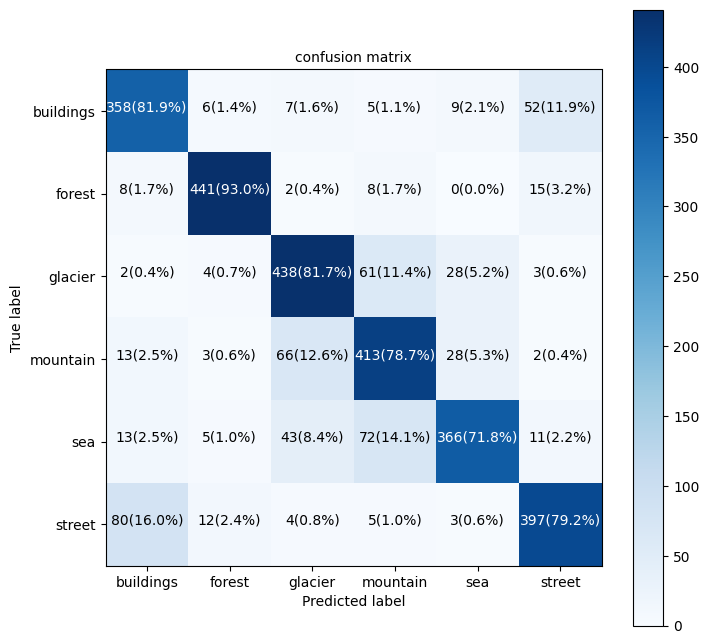

In [54]:
plot_confusion_matrix(true_classes=true_classes, predicted_classes=predicted_classes, class_labels = class_labels, figsize=(8,8), text_size=10)

# Conclusion

We can see that compared with all the models which have been created so far, model_5 has the highest accuracy. 

When inspecting the confusion matrix, a relatively low accuracy (less than 80%) on classes mountain, sea and street was spotted. Besides, 12.6% of images under mountain were predicted as glacier, 11.4% of images were misclassified and vice versa, 14.1% of images under sea were predicted as mountain, and 8.4% of sea images were classified as glacier. The reason could be similar features are presented in the images within these three classes, such as patches of blue colour as both glaciers and the sea are made up of water. Moreover, as we can see during data exploration, some images have noises, for instance, a large block of rock is blocking the sea. This could also affect our model.

Regarding class street which has 79.2% of accuracy, the model often confuses it with buildings. As the confusion matrix shown, 16% of street images are predicted as buildings, while 11.9% of building images are classified as street. Similar reasons could explain the result, as infrastructure and skyscrapers could be presented in images of these two classes. During the data inspecting process, images shoot outside the buildings, focusing on the exterior of the building were discovered.

To further improve the model, the methods, such as adjusting different hyperparameters (the number of filters), adding more layers, and deploying transfer learning, which means using pre-trained models intended for similar problems, could be used. 

# Reference

[1] PUNEET BANSAL. *Intel Image Classification*, [Internet]. 2019 [Cited 15 March 2023] Available from: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

[2] Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning: With applications in R, pages 411–419. [Internet]. 2023 [Cited 15 March 2023] Available from: https://www.statlearning.com/